# Задание №13. Градиентный бустинг

## Введение

Построение композиции — важный подход в машинном обучении, который позволяет объединять большое количество слабых алгоритмов в один сильный. Данный подход широко используется на практике в самых разных задачах.

На лекциях был рассмотрен метод градиентного бустинга, который последовательно строит композицию алгоритмов, причем каждый следующий алгоритм выбирается так, чтобы исправлять ошибки уже имеющейся композиции. Обычно в качестве базовых алгоритмов используют деревья небольшой глубины, поскольку их достаточно легко строить, и при этом они дают нелинейные разделяющие поверхности.

Другой метод построения композиций — случайный лес. В нем, в отличие от градиентного бустинга, отдельные деревья строятся независимо и без каких-либо ограничений на глубину — дерево наращивается до тех пор, пока не покажет наилучшее качество на обучающей выборке.

В этом задании мы будем иметь дело с задачей классификации. В качестве функции потерь будем использовать log-loss:

\begin{equation*}
L(y,z) = -y  \log(z) - (1 - y) \log(1 - z)
\end{equation*}

Здесь через y обозначен истинный ответ, через z — прогноз алгоритма. Данная функция является дифференцируемой, и поэтому подходит для использования в градиентном бустинге. Также можно показать, что при ее использовании итоговый алгоритм будет приближать истинные вероятности классов.

# Реализация в sklearn

В пакете `scikit-learn` градиентный бустинг реализован в модуле `ensemble` в виде классов `GradientBoostingClassifier` и `GradientBoostingRegressor`. Основные параметры, которые будут интересовать нас: `n_estimators`, `learning_rate`. Иногда может быть полезен параметр `verbose` для отслеживания процесса обучения.

Чтобы была возможность оценить качество построенной композиции на каждой итерации, у класса есть метод `staged_decision_function`. Для заданной выборки он возвращает ответ на каждой итерации.

Помимо алгоритмов машинного обучения, в пакете `scikit-learn` представлено большое число различных инструментов. В этом задании будет предложено воспользоваться функцией `train_test_split` модуля `cross_validation`. С помощью нее можно разбивать выборки случайным образом. На вход можно передать несколько выборок (с условием, что они имеют одинаковое количество строк). Пусть, например, имеются данные `X` и `y`, где `X` — это признаковое описание объектов, `y` — целевое значение. Тогда следующий код будет удобен для разбиения этих данных на обучающее и тестовое множества:
```python
X_train, X_test, y_train, y_test =
    train_test_split(X, y, test_size=0.33, 
                                random_state=42)

```


Обратите внимание, что при фиксированном параметре `random_state` результат разбиения можно воспроизвести.

Метрика `log-loss` реализована в пакете `metrics`: `sklearn.metrics.log_loss`. Заметим, что данная метрика предназначена для классификаторов, выдающих оценку принадлежности классу, а не бинарные ответы. И градиентный бустинг, и случайный лес умеют строить такие прогнозы — для этого нужно использовать метод predict_proba:
```python
pred = clf.predict_proba(X_test)
```

Метод `predict_proba` возвращает матрицу, i-й столбец которой содержит оценки принадлежности i-му классу.

Для рисования кривых качества на обучении и контроле можно воспользоваться следующим кодом:
```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(test_loss, 'r', linewidth=2)
plt.plot(train_loss, 'g', linewidth=2)
plt.legend(['test', 'train'])
```


# Материалы
* [Подробнее о градиентном бустинге и особенностях его применения к деревьям](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture09-ensembles.pdf)

# Инструкция по выполнению
   
Загрузите выборку из файла [gbm-data.csv](https://d3c33hcgiwev3.cloudfront.net/_75fb7a1b6f3431b6217cdbcba2fd30b9_gbm-data.csv?Expires=1582502400&Signature=SJf0IRL3Tfy8sWwdIAX0VaPOoBigSaJJBRaMMgZsPw~YhYWwaccntaxkRjfj3~9MMio16PjwRfDK50iyGhAX04Xa7DZr88uw1bklRI7V~3pFVr5ozWtyDOtRJWN9-PP1oc~yQnUW-b1I5n07K8lXMkp4rRbs0CGlIot0vfBWrxs_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A) с помощью pandas и преобразуйте ее в массив numpy (параметр `values` у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию `train_test_split` с параметрами `test_size = 0.8` и `random_state = 241`.


In [1]:
import utils
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('gbm-data.csv')
X = data.drop('Activity', 1).values
y = data.Activity.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка `[1, 0.5, 0.3, 0.2, 0.1]` проделайте следующее:

* Используйте метод `staged_decision_function` для предсказания качества на обучающей и тестовой выборке на каждой итерации.
* Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле:
\begin{equation*}
1 / (1 + e^{−y_{pred}})
\end{equation*} ,где y_pred — предсказанное значение.
* Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции `sklearn.metrics.log_loss`) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.


Start training GradientBoostingClassifier with lr=1

      Iter       Train Loss   Remaining Time 
         1           1.0190           16.90s
         2           0.9192           16.85s
         3           0.8272           17.78s
         4           0.7834           18.10s
         5           0.7109           18.09s
         6           0.6368           17.98s
         7           0.5797           17.94s
         8           0.5610           17.99s
         9           0.5185           18.14s
        10           0.4984           18.13s
        20           0.1999           17.31s
        30           0.1313           16.92s
        40           0.0790           16.32s
        50           0.0511           15.57s
        60           0.0352           14.81s
        70           0.0245           14.02s
        80           0.0162           13.18s
        90           0.0114           12.38s
       100           0.0077           11.55s
       200           0.0004            3.41s


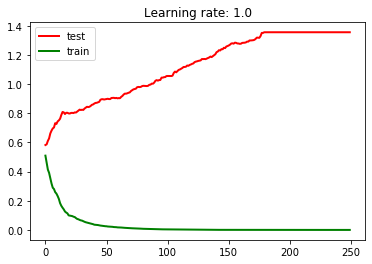

min-loss: 0.5823, iter: 0
Start training GradientBoostingClassifier with lr=0.5

      Iter       Train Loss   Remaining Time 
         1           1.1255           20.13s
         2           1.0035           17.86s
         3           0.9386           17.74s
         4           0.8844           17.89s
         5           0.8381           17.89s
         6           0.7995           18.28s
         7           0.7559           18.60s
         8           0.7205           18.67s
         9           0.6958           18.83s
        10           0.6725           18.62s
        20           0.4672           17.60s
        30           0.3179           16.75s
        40           0.2274           15.92s
        50           0.1774           15.11s
        60           0.1394           14.30s
        70           0.1050           13.47s
        80           0.0805           12.71s
        90           0.0650           11.96s
       100           0.0511           11.18s
       200        

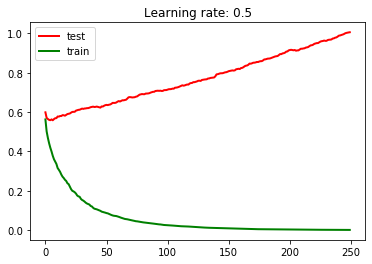

min-loss: 0.5584, iter: 6
Start training GradientBoostingClassifier with lr=0.3

      Iter       Train Loss   Remaining Time 
         1           1.2095           17.61s
         2           1.1006           17.18s
         3           1.0240           17.14s
         4           0.9729           17.11s
         5           0.9387           17.61s
         6           0.8948           17.51s
         7           0.8621           17.65s
         8           0.8360           17.74s
         9           0.8171           17.96s
        10           0.7883           17.95s
        20           0.6029           17.22s
        30           0.4760           16.62s
        40           0.3879           16.24s
        50           0.3325           15.47s
        60           0.2759           14.59s
        70           0.2304           13.76s
        80           0.1969           13.09s
        90           0.1718           12.39s
       100           0.1404           11.70s
       200        

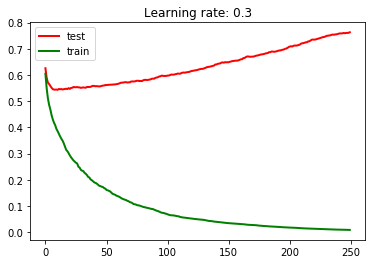

min-loss: 0.5433, iter: 10
Start training GradientBoostingClassifier with lr=0.2

      Iter       Train Loss   Remaining Time 
         1           1.2613           19.74s
         2           1.1715           19.20s
         3           1.1009           19.53s
         4           1.0529           18.90s
         5           1.0130           18.44s
         6           0.9740           18.11s
         7           0.9475           18.22s
         8           0.9197           17.93s
         9           0.8979           18.09s
        10           0.8730           18.08s
        20           0.7207           18.39s
        30           0.6055           17.60s
        40           0.5244           16.62s
        50           0.4501           15.77s
        60           0.3908           14.93s
        70           0.3372           14.10s
        80           0.3009           13.30s
        90           0.2603           12.46s
       100           0.2327           11.69s
       200       

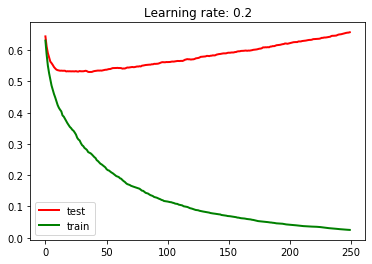

min-loss: 0.5302, iter: 36
Start training GradientBoostingClassifier with lr=0.1

      Iter       Train Loss   Remaining Time 
         1           1.3199           21.12s
         2           1.2645           20.31s
         3           1.2170           21.45s
         4           1.1775           21.34s
         5           1.1404           20.57s
         6           1.1106           20.33s
         7           1.0844           20.17s
         8           1.0617           20.02s
         9           1.0411           19.92s
        10           1.0223           19.76s
        20           0.8864           18.19s
        30           0.7844           17.44s
        40           0.7176           16.65s
        50           0.6590           16.19s
        60           0.6120           15.30s
        70           0.5599           14.47s
        80           0.5242           13.56s
        90           0.4829           12.67s
       100           0.4473           11.80s
       200       

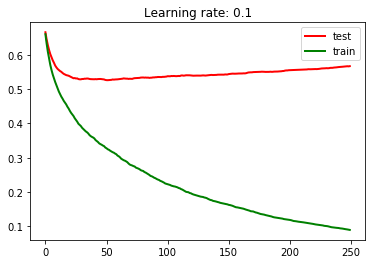

min-loss: 0.5259, iter: 51


In [2]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt

def sigm(Z):
        return 1 / (1 + np.exp(-Z))

train_loss = {}
test_loss = {}

for lr in [1, 0.5, 0.3, 0.2, 0.1]:
    print(f'Start training GradientBoostingClassifier with lr={lr}\n')
    model = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=lr)
    model.fit(X_train, y_train)
    z_train = (sigm(z) for z in model.staged_decision_function(X_train))
    z_test = (sigm(z) for z in model.staged_decision_function(X_test))
    
    train_loss[lr] = [metrics.log_loss(y_train, z) for z in z_train]
    test_loss[lr] = [metrics.log_loss(y_test, z) for z in z_test]

    %matplotlib inline
    plt.plot(test_loss[lr], 'r', train_loss[lr], 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.title(f'Learning rate: {lr:.1f}')
    plt.show()
    min_loss = np.min(test_loss[lr])
    min_loss_iter = np.argmin(test_loss[lr])
    print(f'min-loss: {min_loss:.4f}, iter: {min_loss_iter}')


Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

In [3]:
utils.answer('1', 'overfitting')

Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при `learning_rate = 0.2`.


In [4]:
min_loss = np.min(test_loss[0.2])
min_loss_iter = np.argmin(test_loss[0.2]) + 1
utils.answer('2', f'{min_loss:.2f} {min_loss_iter}')
print(f'min-loss: {min_loss:.2f}, iter: {min_loss_iter}')

min-loss: 0.53, iter: 37


На этих же данных обучите `RandomForestClassifier` с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c `random_state=241` и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции `predict_proba`. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=241, n_estimators=min_loss_iter)
model.fit(X_train, y_train)
z = model.predict_proba(X_test)
loss = metrics.log_loss(y_test, z)
utils.answer('3', f'{loss:.2f}')
loss

0.5410941951182815

Если ответом является нецелое число, то целую и дробную часть необходимо разграничивать точкой, например, 0.42. При необходимости округляйте дробную часть до двух знаков.

Обратите внимание, что, хотя в градиентного бустинге гораздо более слабые базовые алгоритмы, он выигрывает у случайного леса благодаря более "направленной" настройке — каждый следующий алгоритм исправляет ошибки имеющейся композиции. Также он обучается быстрее случайного леса благодаря использованию неглубоких деревьев. В то же время, случайный лес может показать более высокое качество при неограниченных ресурсах — так, он выиграет у градиентного бустинга на наших данных, если увеличить число деревьев до нескольких сотен (проверьте сами!).

Ответ на каждое задание — текстовый файл, содержащий ответ в первой строчке. Обратите внимание, что отправляемые файлы не должны содержать перевод строки в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над тем, чтобы убрать это ограничение.